In [13]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def estimate_pi(num_points):
    points_inside_circle = 0
    points_inside_square = 0
    pi_estimates = []
    
    for i in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        distance = x**2 + y**2
        
        if distance <= 1:
            points_inside_circle += 1
        
        points_inside_square += 1
        
        pi_estimate = 4 * (points_inside_circle / points_inside_square)
        pi_estimates.append(pi_estimate)
    
    return pi_estimates

num_points = 1000
pi_estimates = estimate_pi(num_points)

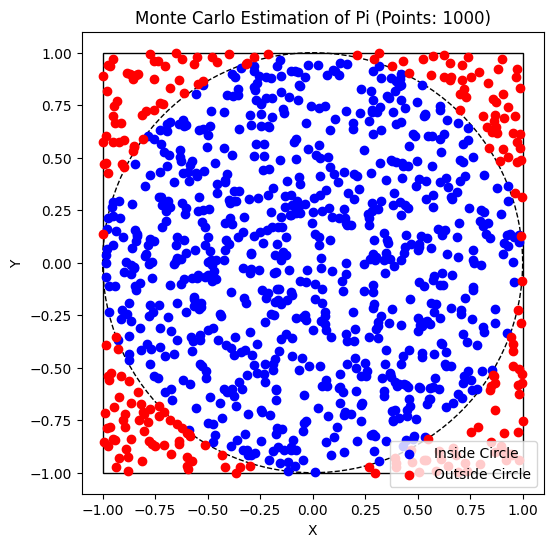

<Figure size 640x480 with 0 Axes>

In [14]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', linestyle='--')
square = plt.Rectangle((-1, -1), 2, 2, edgecolor='black', facecolor='none')

ax.add_artist(circle)
ax.add_artist(square)

x_data = []
y_data = []

def update(frame):
    num_points = frame + 1
    x_data.append(num_points)
    y_data.append(pi_estimates[frame])

    ax.clear()

    ax.set_aspect('equal')
    ax.add_artist(circle)
    ax.add_artist(square)

    ax.scatter(x_inside[:num_points], y_inside[:num_points], color='blue', label='Inside Circle')
    ax.scatter(x_outside[:num_points], y_outside[:num_points], color='red', label='Outside Circle')

    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.set_title('Monte Carlo Estimation of Pi (Points: {})'.format(num_points))
    ax.legend(loc='lower right')

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for i in range(num_points):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)

    distance = x ** 2 + y ** 2

    if distance <= 1:
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

ani = animation.FuncAnimation(fig, update, frames=num_points, blit=False, repeat=False)

dpi = 100
writer = animation.PillowWriter(fps=60)
ani.save("pi_estimation_circle_3000.gif", writer=writer, dpi=dpi)

plt.show()
plt.clf()



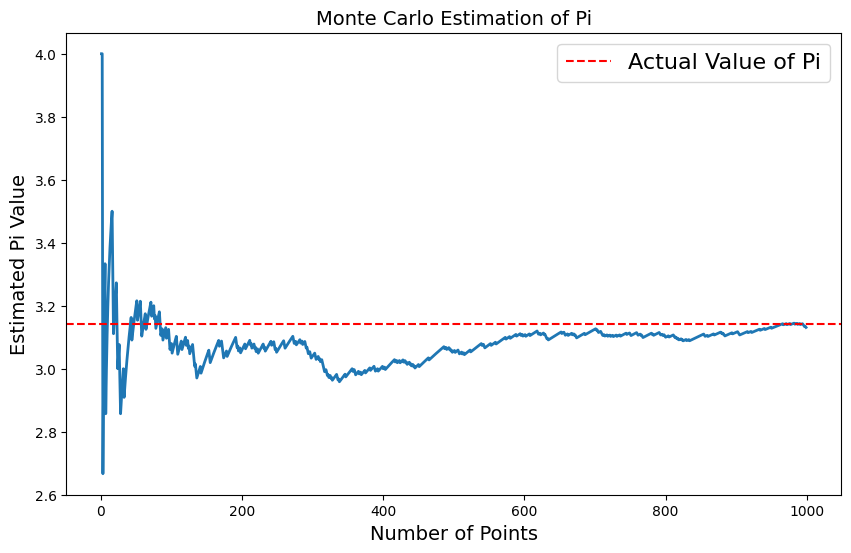

In [15]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2)
ax.axhline(y=3.141592653589793, color='r', linestyle='--', label='Actual Value of Pi')
ax.set_xlabel('Number of Points',fontsize=14)
ax.set_ylabel('Estimated Pi Value',fontsize=14)
ax.set_title('Monte Carlo Estimation of Pi',fontsize=14)
ax.legend(fontsize=16)

x_data = list(range(1, num_points + 1))
y_data = pi_estimates

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    line.axes.relim()
    line.axes.autoscale_view()
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(x_data), init_func=init, blit=True, interval=5)
dpi = 100
writer = animation.PillowWriter(fps=60)
ani.save("pi_estimation_3000_720.gif", writer=writer, dpi=dpi)